In [1]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
#import data and read it as dataframe type
df = pd.read_csv('Selected columns.csv')
df.head()

,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed
0,comedy,access to exclusive content,0.000000,0.0,False,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True
1,comedy,access to exclusive content,22.951579,70.0,False,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True
2,regional,replace OTT,36.001186,25.0,True,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True
3,drama,replace OTT,20.051667,30.0,False,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True
4,comedy,replace OTT,22.951579,28.0,False,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True


In [30]:
#Turn preferred_genre to dummy
df['Dummy_genre'] = df.preferred_genre.apply(lambda x: 1 if 'comedy' in x else 0)
del df["preferred_genre"]
df.head()

,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre
0,access to exclusive content,0.000000,0.0,False,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1
1,access to exclusive content,22.951579,70.0,False,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1
2,replace OTT,36.001186,25.0,True,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0
3,replace OTT,20.051667,30.0,False,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0
4,replace OTT,22.951579,28.0,False,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1


In [31]:
#Turn intended_use to dummy
df['Dummy_intended_use'] = df.intended_use.apply(lambda x: 1 if 'exclusive content' in x else 0)
del df["intended_use"]
df.head()

,weekly_consumption_hour,age,male_TF,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use
0,0.000000,0.0,False,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1,1
1,22.951579,70.0,False,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1,1
2,36.001186,25.0,True,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0,0
3,20.051667,30.0,False,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0,0
4,22.951579,28.0,False,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1,0


In [32]:
#Turn weekly_consumption_hour to dummy
df['Dummy_weekly_consumption_hour'] = df.weekly_consumption_hour.apply(lambda x: 1 if x>40 else 0)
del df["weekly_consumption_hour"]
df.head()

,age,male_TF,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour
0,0.0,False,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1,1,0
1,70.0,False,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1,1,0
2,25.0,True,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0,0,0
3,30.0,False,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0,0,0
4,28.0,False,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1,0,0


In [33]:
#Turn age to dummy
df['Dummy_age'] = df.age.apply(lambda x: 1 if x<20 else 0)
del df["age"]
df.head()

,male_TF,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age
0,False,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1,1,0,1
1,False,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1,1,0,0
2,True,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0,0,0,0
3,False,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0,0,0,0
4,False,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1,0,0,0


In [34]:
#Turn gender to dummy
df['Dummy_male_TF'] = df.male_TF.apply(lambda x: 1 if x=='False' else 0)
del df["male_TF"]
df.head()

,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF
0,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1,1,0,1,1
1,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1,1,0,0,1
2,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0,0,0,0,0
3,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0,0,0,0,1
4,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1,0,0,0,1


In [35]:
#Turn channel to dummy, keep the orignial columns
df['Dummy_channel'] = df.attribution_technical.apply(lambda x: 1 if x=='bing'or x=='display'or 
                                                     x=='facebook'or x=='search'or x=='youtube' else 0)
df.head()

,attribution_technical,account_creation_date,initial_credit_card_declined,join_fee,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF,Dummy_channel
0,facebook,2020-01-24 21:44:16,False,0.0000,True,2020-02-07 21:44:16,0,True,1,1,0,1,1,1
1,facebook,2020-03-01 15:44:35,False,0.3303,True,2020-03-15 15:44:35,0,True,1,1,0,0,1,1
2,organic,2019-12-07 16:37:06,False,0.1101,False,0,0,True,0,0,0,0,0,0
3,search,2020-01-27 16:09:32,False,0.0367,False,0,0,True,0,0,0,0,1,1
4,discovery,2019-10-05 12:57:07,False,0.0367,True,2020-02-19 12:57:07,0,True,1,0,0,0,1,0


In [36]:
#Turn join_fee to dummy 
df['Dummy_join_fee'] = df.join_fee.apply(lambda x: 1 if x==0.1101 else 0)
del df["join_fee"]
df.head()

,attribution_technical,account_creation_date,initial_credit_card_declined,current_sub_TF,last_payment,cancel_date,trial_completed,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF,Dummy_channel,Dummy_join_fee
0,facebook,2020-01-24 21:44:16,False,True,2020-02-07 21:44:16,0,True,1,1,0,1,1,1,0
1,facebook,2020-03-01 15:44:35,False,True,2020-03-15 15:44:35,0,True,1,1,0,0,1,1,0
2,organic,2019-12-07 16:37:06,False,False,0,0,True,0,0,0,0,0,0,1
3,search,2020-01-27 16:09:32,False,False,0,0,True,0,0,0,0,1,1,0
4,discovery,2019-10-05 12:57:07,False,True,2020-02-19 12:57:07,0,True,1,0,0,0,1,0,0


In [37]:
#Turn trial_completed to dummy 
df['Dummy_trial_completed'] = df.trial_completed.apply(lambda x: 1 if x==True else 0)
del df["trial_completed"]
df.head()

,attribution_technical,account_creation_date,initial_credit_card_declined,current_sub_TF,last_payment,cancel_date,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF,Dummy_channel,Dummy_join_fee,Dummy_trial_completed
0,facebook,2020-01-24 21:44:16,False,True,2020-02-07 21:44:16,0,1,1,0,1,1,1,0,1
1,facebook,2020-03-01 15:44:35,False,True,2020-03-15 15:44:35,0,1,1,0,0,1,1,0,1
2,organic,2019-12-07 16:37:06,False,False,0,0,0,0,0,0,0,0,1,1
3,search,2020-01-27 16:09:32,False,False,0,0,0,0,0,0,1,1,0,1
4,discovery,2019-10-05 12:57:07,False,True,2020-02-19 12:57:07,0,1,0,0,0,1,0,0,1


In [39]:
# get 8 dummy variable
selected_columns = df[['Dummy_genre','Dummy_intended_use','Dummy_weekly_consumption_hour','Dummy_age',
                       'Dummy_male_TF','Dummy_channel','Dummy_join_fee','Dummy_trial_completed']]
selected_columns.head()

,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF,Dummy_channel,Dummy_join_fee,Dummy_trial_completed
0,1,1,0,1,1,1,0,1
1,1,1,0,0,1,1,0,1
2,0,0,0,0,0,0,1,1
3,0,0,0,0,1,1,0,1
4,1,0,0,0,1,0,0,1


In [44]:
# output the Dummy columns to Excel to visualize
selected_columns.to_csv('dummy_Selected columns.csv')

### Churn data preparing

In [51]:
# change the data type of the account_creation_date, last_payment date 
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   attribution_technical          227628 non-null  object        
 1   account_creation_date          227628 non-null  datetime64[ns]
 2   initial_credit_card_declined   227628 non-null  bool          
 3   current_sub_TF                 227628 non-null  bool          
 4   last_payment                   227628 non-null  object        
 5   cancel_date                    227628 non-null  object        
 6   Dummy_genre                    227628 non-null  int64         
 7   Dummy_intended_use             227628 non-null  int64         
 8   Dummy_weekly_consumption_hour  227628 non-null  int64         
 9   Dummy_age                      227628 non-null  int64         
 10  Dummy_male_TF                  227628 non-null  int64         
 11  

In [53]:
# output the Dummy columns to Excel to visualize
selected_columns = df[['Dummy_genre','Dummy_intended_use','Dummy_weekly_consumption_hour','Dummy_age',
                       'Dummy_male_TF','Dummy_channel','Dummy_join_fee','Dummy_trial_completed',
                       'account_creation_date','last_payment','cancel_date']]
selected_columns.to_csv('Churn model columns.csv')

### K-Means

In [42]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-',color="r")
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

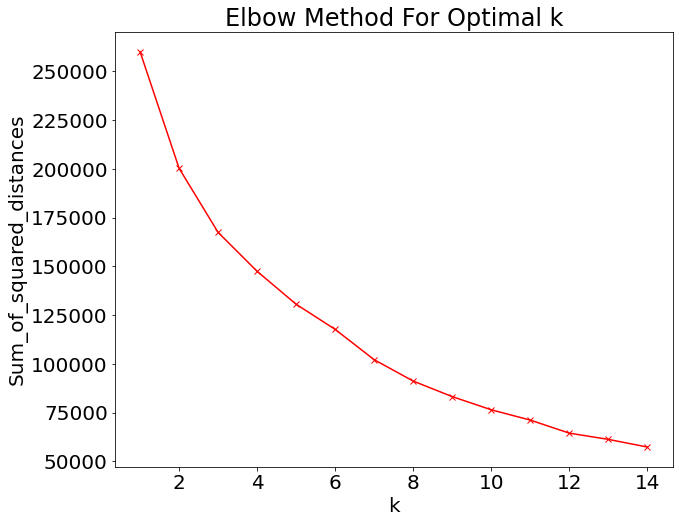

In [43]:
fitting(selected_columns)

K=3 should be a good parameter for K-means clustering.

In [45]:
kmean=KMeans(n_clusters=3).fit(selected_columns)
x = pd.DataFrame(kmean.cluster_centers_, columns=['Dummy_genre','Dummy_intended_use','Dummy_weekly_consumption_hour','Dummy_age','Dummy_male_TF','Dummy_channel','Dummy_join_fee','Dummy_trial_completed'])
x

,Dummy_genre,Dummy_intended_use,Dummy_weekly_consumption_hour,Dummy_age,Dummy_male_TF,Dummy_channel,Dummy_join_fee,Dummy_trial_completed
0,1.000000e+00,-2.342571e-14,0.014862,0.203852,0.903344,0.504003,0.053710,0.888377
1,-7.449596e-14,2.733499e-01,0.022600,0.042945,0.858137,0.461115,0.040008,0.813282
2,9.341165e-01,1.000000e+00,0.013566,0.306807,0.898906,0.480158,0.050016,0.975378
